# TP: Introduction to Python

In [116]:
%matplotlib
%matplotlib inline
import numpy as np                  # import a package with specified name
from sklearn import linear_model    # import whole module
from os import mkdir, rmdir, path   # import a function
from inspect import getsourcelines  # get function source code
import string
import time
import pandas as pd
import matplotlib.pyplot as plt     # for plots
import seaborn as sns               # for plots

sns.set_palette("colorblind")
color_blind_list = sns.color_palette("colorblind", 8)
plt.style.use('bmh')

Using matplotlib backend: TkAgg


In [117]:
# initialize random generator.
# see: https://numpy.org/doc/stable/reference/random/index.html#random-quick-start
rng = np.random.default_rng(17)

# 1) Introduction: Python, Numpy et Scipy

## Question 1 : 
Écrire une fonction ```nextpower``` qui calcule la première puissance de 2 supérieure ou égale à un nombre $n$ (on veillera a ce que le type de sortie soit un <font color='red'>**int**</font>, tester cela avec <font color='red'>**type**</font> par exemple).

In [118]:
def nextpower(n):
    """Return the next power of 2 of n."""
    return 2**(n-1).bit_length()

In [119]:
# Tester la fonction ici
print(nextpower(12))

16


## Question 2 :
En partant du mot contenant toutes les lettres de l'alphabet, générer par une opération de *slicing* la chaîne de caractère ```cfilorux``` et, de deux façons différentes, la chaîne de caractère ```vxz```.

In [120]:
alphabet = string.ascii_lowercase

In [121]:
# slicing goes here.
print(alphabet[2:26:3])
print(alphabet[21:26:2])
print(alphabet[-5:26:2])

cfilorux
vxz
vxz


## Question 3 :
Afficher le nombre $\pi$ avec 9 décimales après la virgule.

In [122]:
# π
pi = np.pi
print(float(str(pi)[:11]))
print(round(pi,9))
print("%.9F" % pi)
print(f"{pi:.9F}")


3.141592653
3.141592654
3.141592654
3.141592654


## Question 4 :
Compter le nombre d’occurrences de chaque caractère dans la chaîne de caractères ```s="HelLo WorLd!!!" ```. On renverra un dictionnaire qui à chaque lettre associe son nombre d’occurrences.

In [123]:
# compter ici.
def count_letters(s):
    """Count the number of occurence of letters in a string."""
    return {letter: s.count(letter) for letter in s}

# Tester la fonction ici
count_letters("Hello World!")

{'H': 1, 'e': 1, 'l': 3, 'o': 2, ' ': 1, 'W': 1, 'r': 1, 'd': 1, '!': 1}

## Question 5 :
Écrire une fonction de codage par inversion de lettres (aussi connu sous le nom de code de César): chaque lettre d'un mot est remplacée par une (et une seule) autre. On se servira de la fonction ```shuffle``` sur la chaîne de caractère contenant tout l'alphabet, ou de ```rng.permutation```

In [124]:
b = list(alphabet)
c = b.copy()
c = rng.permutation(c)
d = "".join(c)
print(d)

dgruefmywoxqjizhbanpckslvt


In [125]:
def coding(message, clef):
    """encodage"""
    return "".join([alphabet[(alphabet.index(letter) + clef) % 26] for letter in message])

In [126]:
# test coding here.
message = "abc"
print(coding(message, 1))

bcd


PS: un peu de lecture sur l'utf8: [sam & max](https://web.archive.org/web/20200214133339/http://sametmax.com/lencoding-en-python-une-bonne-fois-pour-toute)

## Question 6 :
Calculer $ 2 \displaystyle\prod_{k=1}^{\infty}\frac{4 k^2}{4k^2-1}$ efficacement. On pourra utiliser ```time``` (ou ```%timeit``` pour déterminer la rapidité de votre méthode. Proposer une version sans boucle utilisant ```Numpy```.

In [127]:
def wallis(k):
    t = 1
    for i in range(1,k+1):
        t *= (4 * i*i) / (4 * i*i - 1)
    return t * 2

def wallis_numpy(k):
    i = np.arange(1, k+1)
    return np.prod((4 * i*i) / (4 * i*i - 1)) * 2

Les commandes "magic" de type %timeit dans Jupyter peuvent aussi s'averer utiles:

In [128]:
# time here.
print(wallis(10))
print(wallis_numpy(10))

%timeit wallis(10)
%timeit wallis_numpy(10)

3.0677038066434985
3.0677038066434985
1.65 µs ± 87.8 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
15.8 µs ± 1.77 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


## Question 7 :
Créer une fonction ```quicksort``` qui trie une liste, en remplissant les éléments manquants dans le code suivant. On testera que la fonction est correcte sur l'exemple ```quicksort([-2, 3, 5, 1, 3])```:

In [129]:
def quicksort(ll):
    """A sorting function with a pivot value."""
    if len(ll) <= 1:
        return ll
    else:
        pivot = ll[0]
        less = []
        greater = []
        for x in ll[1:]:
            if x <= pivot:
                less.append(x)
            else:
                greater.append(x)
        return quicksort(less) + [pivot] + quicksort(greater)

In [130]:
# test here.
print(quicksort([-2, 3, 5, 1, 3]))

[-2, 1, 3, 3, 5]


## Question 8 : 
Sans utiliser de boucles ```for / while ```:
créer une matrice $M \in \mathbb{R}^{5\times6}$ aléatoire à coefficients uniformes dans $[-1, 1]$, puis remplacer une colonne sur deux par sa valeur moins le double de la colonne suivante. Remplacer enfin les valeurs négatives par 0 en utilisant un masque binaire.

In [131]:
np.set_printoptions(precision=3) # makes printing matrices easier on the eyes.

In [132]:
# la matrice ici.
A = np.random.uniform(-1, 1, (5, 6))
print(A)
A[:,::2] = A[:,::2] - A[:,1::2]*2
print(A)
print(abs(A))

[[-0.472 -0.821 -0.079 -0.339  0.045  0.923]
 [ 0.02  -0.554 -0.018 -0.828  0.205 -0.26 ]
 [ 0.096  0.506  0.077  0.897  0.943 -0.604]
 [ 0.518  0.419  0.801  0.175 -0.348 -0.06 ]
 [-0.448 -0.368  0.873 -0.725  0.224 -0.134]]
[[ 1.169 -0.821  0.599 -0.339 -1.801  0.923]
 [ 1.127 -0.554  1.638 -0.828  0.725 -0.26 ]
 [-0.917  0.506 -1.718  0.897  2.15  -0.604]
 [-0.319  0.419  0.451  0.175 -0.228 -0.06 ]
 [ 0.288 -0.368  2.322 -0.725  0.491 -0.134]]
[[1.169 0.821 0.599 0.339 1.801 0.923]
 [1.127 0.554 1.638 0.828 0.725 0.26 ]
 [0.917 0.506 1.718 0.897 2.15  0.604]
 [0.319 0.419 0.451 0.175 0.228 0.06 ]
 [0.288 0.368 2.322 0.725 0.491 0.134]]


## Question 9 :
Créer une matrice $M \in \mathbb{R}^{5\times 20}$ aléatoire à coefficients uniformes dans $[-1, 1]$. Tester que $G=M^\top M$ est symétrique et que ses valeurs propres sont positives (on parle de alors de matrice définie positive). Quel est le rang de $G$?
  
**Aide**: on utilisera par exemple ```np.allclose, np.logical_not, np.all``` pour les tests numériques.

In [133]:
#matrice
M = np.random.uniform(-1, 1, (5, 5))
G = M.T @ M
print(G)
print(np.all(np.linalg.eigvals(G) > 0))

[[ 2.087 -1.284 -0.264 -0.578  0.405]
 [-1.284  1.91   0.644  0.412  0.83 ]
 [-0.264  0.644  0.633  0.87   0.836]
 [-0.578  0.412  0.87   2.413  0.611]
 [ 0.405  0.83   0.836  0.611  1.625]]
True


In [134]:
#calcul du rang
print(np.linalg.matrix_rank(G))

5


# 2)  Introduction: Pandas, Matplotlib, etc.

## Question 1 :
Chargement de la base de données. Détecter et dénombrer le nombre de lignes ayant des valeurs manquantes.

In [135]:
url = u'https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip'

In [136]:
# Detect and count lines with missing values.
na_values = ['?', '']
fields = ['Date', 'Time', 'Global_active_power']

# Whole columns names:
# Date;Time;Global_active_power;Global_reactive_power;Voltage;Global_intensity;Sub_metering_1;Sub_metering_2;Sub_metering_3

powerDf = pd.read_csv(url, sep=';', nrows=200000, na_values=na_values, usecols=fields,)

# Count the number of missing values in each column.
print(powerDf.isna().sum().sum())

3732


In [137]:
powerDf.head()

,Date,Time,Global_active_power
0,16/12/2006,17:24:00,4.216
1,16/12/2006,17:25:00,5.360
2,16/12/2006,17:26:00,5.374
3,16/12/2006,17:27:00,5.388
4,16/12/2006,17:28:00,3.666


## Question 2 :
Supprimer toutes les lignes avec des valeurs manquantes.

In [138]:
powerDf = powerDf.dropna()
powerDf

,Date,Time,Global_active_power
0,16/12/2006,17:24:00,4.216
1,16/12/2006,17:25:00,5.360
2,16/12/2006,17:26:00,5.374
3,16/12/2006,17:27:00,5.388
4,16/12/2006,17:28:00,3.666
...,...,...,...
199995,4/5/2007,14:39:00,0.348
199996,4/5/2007,14:40:00,0.344
199997,4/5/2007,14:41:00,0.342
199998,4/5/2007,14:42:00,0.340


## Question 3 :
 Utiliser ```to_datetime``` et ```set_index``` pour indexer le Data Frame (on prendra garde au format des dates internationales qui diffère du format français).


In [139]:
powerDf.set_index(pd.to_datetime(powerDf['Date'] + ' ' + powerDf['Time'], format='%d/%m/%Y %H:%M:%S'), inplace=True)

## Question 4 :
Afficher le graphique des moyennes journalières entre le 1er janvier et le 30 avril 2007. Proposer une cause expliquant la consommation fin février et début avril. On pourra utiliser en plus de ```matplotlib``` le package ```seaborn``` pour améliorer le rendu visuel.

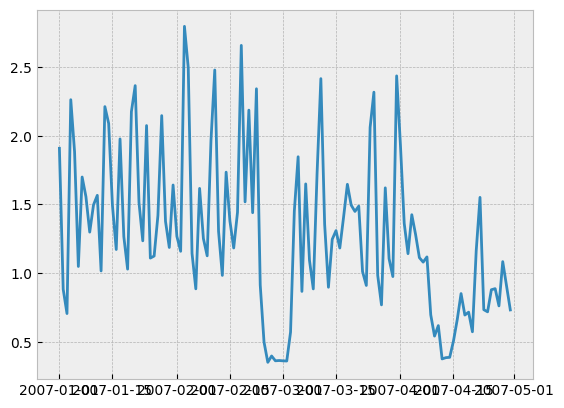

<AxesSubplot:ylabel='Global_active_power'>

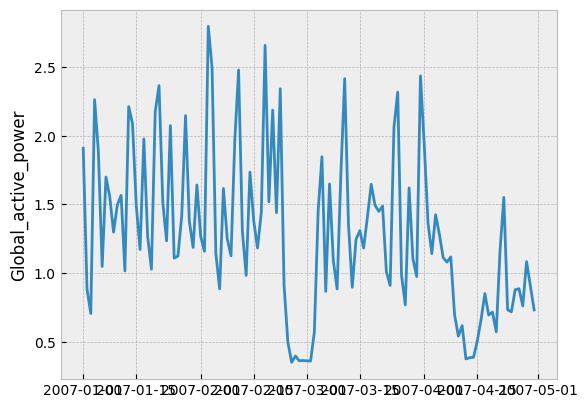

In [140]:
powerDf2 = powerDf.loc["2007-01-01":"2007-04-30", 'Global_active_power']
means = powerDf2.groupby(powerDf2.index.floor('D')).mean()
plt.plot(means)
plt.show()
sns.lineplot(means)

## Question 5 : 
Charger les données avec ```pandas```, et ne garder que les colonnes ```DATE``` et ```TG```.
Diviser par 10 la colonne TG pour obtenir des températures en degrés Celsius.
Traiter les éléments de température aberrants comme des ```NaN```.

In [ ]:
url = "./Data sets-20220913/ECAD_2016-09-11 copy.txt"

# first get all lines from file
with open(url, 'r') as f:
    lines = f.readlines()

# remove spaces
lines = [line.replace(' ', '') for line in lines]

# finally, write lines in the file
with open(url, 'w') as f:
    f.writelines(lines)

In [ ]:

na_values = ['-9999', '', 'NaN']
fields = ['DATE', 'TG']
tempDf = pd.read_csv(url, sep=',', na_values=na_values, usecols=fields,)
tempDf = tempDf.dropna()
tempDf

,DATE,TG
0,19210301,50.0
1,19210302,46.0
2,19210303,46.0
3,19210304,31.0
4,19210305,95.0
...,...,...
34878,20160827,266.0
34879,20160828,255.0
34880,20160829,206.0
34881,20160830,204.0


In [ ]:
tempDf['TG'] = tempDf['TG'] / 10
tempDf

,DATE,TG
0,19210301,5.0
1,19210302,4.6
2,19210303,4.6
3,19210304,3.1
4,19210305,9.5
...,...,...
34878,20160827,26.6
34879,20160828,25.5
34880,20160829,20.6
34881,20160830,20.4


## Question 6 :
Créer un DataFrame **pandas** des températures journalières entre le 1er janvier et le 30 avril 2007. Afficher sur un même graphique ces températures et la séries *Global_active_power*.

DATE
2007-01-01     9.6
2007-01-02     6.0
2007-01-03     6.1
2007-01-04     9.2
2007-01-05    10.0
              ... 
2007-04-26    19.2
2007-04-27    20.0
2007-04-28    20.0
2007-04-29    19.0
2007-04-30    16.9
Name: TG, Length: 120, dtype: float64
2007-01-01    1.909031
2007-01-02    0.881414
2007-01-03    0.704204
2007-01-04    2.263481
2007-01-05    1.884281
                ...   
2007-04-25    0.877890
2007-04-26    0.885740
2007-04-27    0.759953
2007-04-28    1.082762
2007-04-30    0.730594
Name: Global_active_power, Length: 119, dtype: float64


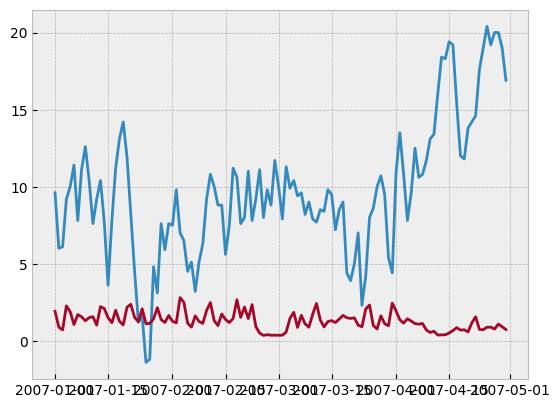

In [ ]:
tempDf.set_index(pd.to_datetime(tempDf['DATE'], format='%Y%m%d'), inplace=True)
print(tempDf.loc['2007-01-01':'2007-04-30', 'TG'])
print(means)
plt.plot(tempDf.loc['2007-01-01':'2007-04-30', 'TG'])
plt.plot(means)
plt.show()

## Question 7 :
On considère maintenant le jeu de données ```20080421_20160927-PA13_auto.csv```.
Proposer une visualisation de la pollution pour l'ozone sur la période d'étude.

In [ ]:
!wget -OMDIDATA.zip https://partage.imt.fr/index.php/s/5NGHoNZtXKzGqGK/download
!unzip MDIDATA.zip

'wget' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.
'unzip' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


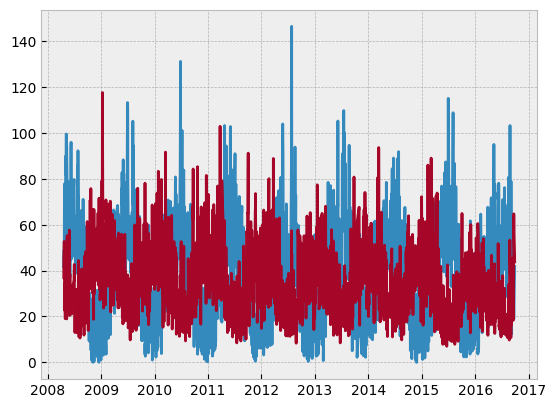

In [144]:
my_file ='Data sets-20220913/20080421_20160927-PA13_auto.csv'
na_values = ['NaN', 'microg/m3', 'n/d']
O3Df = pd.read_csv(my_file, sep=';', na_values=na_values)
O3Df = O3Df.dropna()
O3Df['heure'] = O3Df['heure'].astype(int).astype(str)
O3Df['date'] = pd.to_datetime(O3Df['date'], format='%d/%m/%Y')
O3mean = O3Df.groupby(O3Df['date'].dt.floor('D')).mean()
O3mean

plt.plot(O3mean['O3'])
plt.plot(O3mean['NO2'])
plt.show()

## Question 8 :
 Proposer une visualisation de la pollution la plus critique par année pour l'ozone et pour pour le
dioxyde d'azote.

## Question 9 :
Donner une représentation par mois de la pollution. Quel est le mois le plus pollué pour l'ozone, pour le dioxyde de souffre?

In [ ]:
# study month-wide